# Advanced Business Analytics (CIS442D)

## Homework Assignment 3
### Due date: 1/26/2017 23:55
### Submission Instructions
1. Each student should submit an individual homework assignment.
2. Discussing solutions with others is allowed.
3. Copying solutions is prohibited.
4. Late submissions will not be accepted.
5. Write your solutions in Jupyter IPython notebooks. Use markdown cells to format your document. Your solutions should be replicable, as it will be executed on the grader's computer.
6. Solution files should be uploaded to Blackboard.
---

# Problems from the previous homework that should be submitted together with homework 3

## (1) Databases and sql 
The file "pageviews" contains a table with 4 columns.
1. Load the data file into a table in the empty database "empty_db.sqlite".
2. Write and execute a sql query that computes the sum of the third column of the newly created table.

In [4]:
# write solution here
import sqlite3
import csv
import pandas as pd

# to see the current folder
!ls
!cp "empty_db.sqlite" "db.sqlite" 

# open files
file = open('pageviews')
df = pd.read_csv("pageviews", sep=" ", names=["Project","Title","Pageviews","x"],encoding='utf8')
df.to_csv('data_out.csv',index=False)
file.close
!head -5 "data_out.csv"

# connect to the database
con = sqlite3.connect('db.sqlite')

# load input data
csvfile = open('data_out.csv')
csvReader = csv.reader(csvfile)
header = next(csvReader) # skip first row (header)

#con.execute("DROP TABLE tbl")
#con.commit()

# create table
con.execute("CREATE TABLE tbl(Project TEXT, Title TEXT, Pageviews INTEGER, x INTEGER);")
con.commit()

# populate data in to table
for rec in csvReader: # iterate over the other rows
    con.execute("INSERT INTO tbl VALUES %s"%str(tuple(rec)))  
csvfile.close()    
con.commit() 
con.close()


# run sql command
con = sqlite3.connect('db.sqlite')
df = pd.read_sql_query("""SELECT sum(Pageviews) 
                            FROM tbl 
                           """, con)
con.close()
df.head()

data_out.csv      empty_db.sqlite   html_example.txt  pageviews
db.sqlite         homework3.ipynb   html_example2.txt
Project,Title,Pageviews,x
aa,Main_Page,1,0
aa.d,Main_Page,1,0
aa.m,Main_Page,1,0
ab,1942,1,0


,sum(Pageviews)
0,233058


## (2) Web-scraping 
HTML are XML documents that specify the content and design of web-pages. For example, the file html_example.txt contains the HTML representation of the following table: 

| A | B | C |
|---|---|---|
| D | E | F |


In [ ]:
!cat html_example.txt



The TABLE element is used to indicate the beginning of the table, TR elements indicate beginning of rows, and TD elements indicate beginning of columns. The text that appears between the TD tags specifies cells content. 

As another example, hyperlinks are specified using the A tag. That is, for a link to the website "http://www.w3schools.com" whose label in a webpage is "Visit W3Schools.com", there is a corresponding A element (that is, an element whose tag is A). The file html_example2.txt contains the HTML specification for this link:

In [ ]:
!cat html_example2.txt

Pick a Wikipedia article of your choice. 
1. Print all hyperlinks appearing your article (links to other websites or wikipedia pages)
2. Print a list with Wikipedia articles referenced from your chosen article
3. Choose a webpage (not necessarily in Wikipedia) that contains tabular information. Write code that reads the webpage and creates a DataFrame, which contains that table.

In [18]:
# write solution here
from lxml import html
from lxml import etree
import requests
import pandas as pd
import lxml.html

page = requests.get('https://en.wikipedia.org/wiki/League_of_Legends')
tree = html.fromstring(page.content)

# scraping all the links with xpath
links = tree.xpath("/html/body//a/@href")

# print the links
for i in links:
    print(i)
    

/wiki/Wikipedia:Protection_policy#semi
#mw-head
#p-search
/wiki/BetFred_League_of_Legends
/wiki/Lol_(disambiguation)
/wiki/File:League_of_Legends_logo.png
/wiki/Video_game_developer
/wiki/Riot_Games
/wiki/Video_game_publisher
/wiki/Video_game_producer
/wiki/Video_game_designer
/wiki/Steve_Feak
/wiki/Game_artist
/wiki/George_Krstic
/wiki/Video_game_music
/wiki/Computing_platform
/wiki/Microsoft_Windows
/wiki/MacOS
/wiki/Video_game_genre
/wiki/Multiplayer_online_battle_arena
/wiki/Multiplayer_video_game
/wiki/Multiplayer_online_battle_arena
/wiki/Riot_Games
/wiki/Microsoft_Windows
/wiki/MacOS
/wiki/Freemium
/wiki/Microtransaction
/wiki/Warcraft_III:_The_Frozen_Throne
/wiki/Mod_(video_gaming)
/wiki/Defense_of_the_Ancients
#cite_note-1up-dotagenre-1
#cite_note-newplayerguide-2
#cite_note-forbes-3
#cite_note-wsj-4
#cite_note-5
#cite_note-6
/wiki/League_of_Legends_Championship_Series
/wiki/Los_Angeles
/wiki/Berlin
#cite_note-7
/wiki/China
/wiki/South_Korea
/wiki/Taiwan
#cite_note-8
/wiki/Sou

In [25]:
# scraping the external text class with only text value
ref = tree.xpath("//a[@class='external text']//text()")

# Print the result
for i in ref:
    print(i)
    print('\n')


"Clash of The DOTAs"


"New Player Guide"


"Riot Games' League Of Legends Officially Becomes Most Played PC Game In The World"


"Player Tally for 'League of Legends' Surges"


"2015 SEASON: 10 Teams, Expansion Tournament & Circuit Points"


"Desafio Internacional - League of Legends - Santiago, Chile - 2015"


"32 million people watched League of Legends Season 3 World Championships"


"League of Legends 2014 World Championships"


"Top 100 Largest Overall Prize Pools"


"Update: Fan Contributions to Worlds Prize Pool"


"New Player Guide"


"Game Modes"


"Retiring Dominion | League of Legends"


"Champions : League of Legends"


"New Player Guide"


"Summoner's Rift"


"League of Legends Objectives guide: Priority and Timers"


"The Twisted Treeline"


League Of Legends' "All Random All Mid" Mode Gets Official


"The Crystal Scar"


League of Legends: Dominion mode launches


"Retiring Dominion"


"Matchmaking Guide"


Dev Blog: Classes & Subclasses


CHOOSING THE RIGHT CHAMPION




In [4]:
page = requests.get('https://en.wikipedia.org/wiki/League_of_Legends')
tree = html.fromstring(page.content)
tables = tree.xpath('.//table')
population_table = tables[4]

rows_parsed = []
for row_elements in population_table:
    row = []
    for col_elements in row_elements:
        row.append(col_elements.text_content())
    rows_parsed.append(row)
    
pd.DataFrame(rows_parsed[1:], columns=rows_parsed[0])

,Date,Awards,Category,Result
0,"December 14, 2009",IGN PC Best Strategy Game 2009,Readers' Choice,Winner[89]
1,"December 21, 2009",GameSpy Gamers' Choice Awards 2009,PC Gamers' Choice,Winner[90]
2,"October 8, 2010",1st Game Developers Online Choice Awards,"Best Online Technology, Visual Arts, Game Desi...",Winner[91]
3,"October 29, 2010",Golden Joystick Award,Online Game of the Year,Winner[92]
4,"October 21, 2011",Golden Joystick Award,Best Free-to-Play Game,Winner[93]
5,"December 3, 2015",The Game Award,eSports Game of the Year Award,Nominated[94]


# Support vector machine

The questions are from the book "An Introduction to Statistical Learning, with applications in R"  by G. James, D. Witten,  T. Hastie and R. Tibshirani.

The book can be downloaded from the following link: <a href="http://www-bcf.usc.edu/~gareth/ISL/">link</a>

## (3) Chapter 9, exercise 1

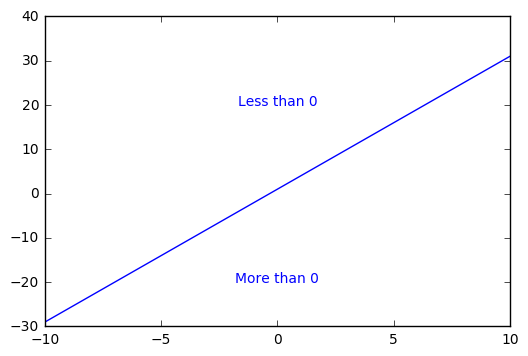

In [3]:
# write solution here
from sklearn import svm # read more at: scikit-learn.org
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(-10,10)
y = 3*x+1
plt.plot(x,y)

plt.text(0, 20,'Less than 0',ha='center', color = 'blue')
plt.text(0, -20,'More than 0',ha='center', color = 'blue')




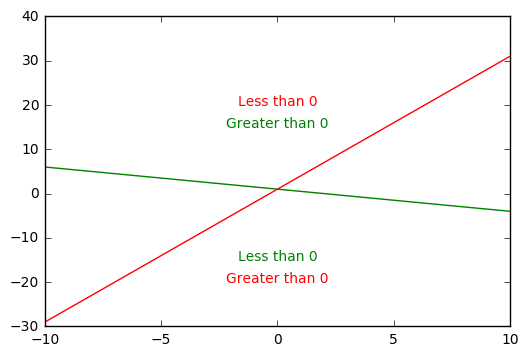

In [42]:
x = np.linspace(-10,10)
y = 3*x+1
y1 = 1-0.5*x
plt.plot(x,y,color = 'red')
plt.plot(x,y1,color = 'green')
plt.text(0, 20,'Less than 0',ha='center', color = 'red')
plt.text(0, -20,'Greater than 0',ha='center', color = 'red')
plt.text(0, 15,'Greater than 0',ha='center', color = 'green')
plt.text(0, -15,'Less than 0',ha='center', color = 'green')


## (4) Chapter 9, exercise 3

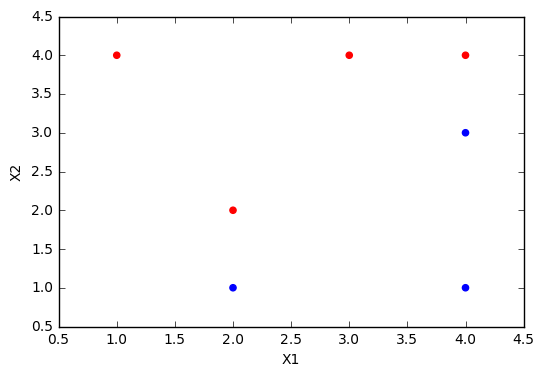

In [5]:
# write solution here
data = {'x1':[3,2,4,1,2,4,4], 'x2':[4,2,4,4,1,3,1], 'c':['red','red','red','red','blue','blue','blue']}
df = pd.DataFrame(data)
df
plt.scatter(df['x1'],df['x2'],color = df['c'],cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')


beta0=  1.00 
beta1= -2.00 
beta2=  2.00


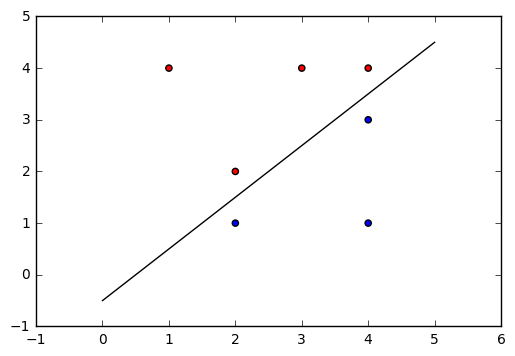

In [9]:
# Question b
# Compute the coefficent for the optimal seperate hyperplane
clf = svm.SVC(kernel='linear',C=10**10)
clf.fit(df[['x1','x2']], df['c'])

beta1,beta2 = clf.coef_[0]
beta0 = clf.intercept_[0]

print('beta0=%6.2f \nbeta1=%6.2f \nbeta2=%6.2f'%(beta0,beta1,beta2))


# Plot the point and hyperplane
fig, ax = plt.subplots()
ax.scatter(df['x1'], df['x2'], c=df['c'], cmap=plt.cm.Paired)
X1_range = [0,5]
X2_hyperplane = list(map(lambda x1:(-beta0-beta1*x1)/beta2, X1_range))
ax.plot(X1_range,X2_hyperplane,'-k')



beta0=  1.00 
beta1= -2.00 
beta2=  2.00
Margin: 0.353657001043
support vectors indexes: [4 5 1 2]


(-2, 6)

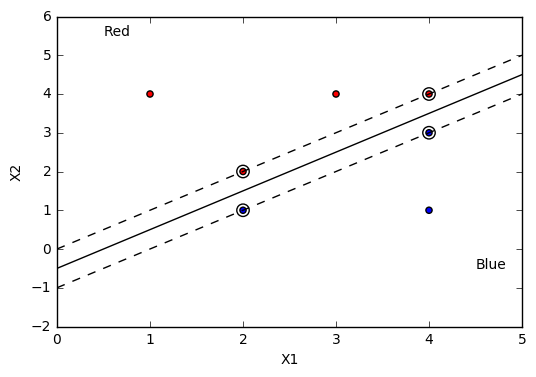

In [7]:
# plot hyperplane, margins and support vectors
clf = svm.SVC(kernel='linear',C=10**10)
clf.fit(df[['x1','x2']], df['c'])
# Question c
# calulate the coefficent of classiﬁcation rule for the maximal margin classiﬁer
beta1,beta2 = clf.coef_[0]
beta0 = clf.intercept_[0]
M = 1/np.sqrt(beta1**2 + beta2**2)
print('beta0=%6.2f \nbeta1=%6.2f \nbeta2=%6.2f'%(beta0,beta1,beta2))
print('Margin:', M)
print('support vectors indexes:', clf.support_)
df.ix[clf.support_,:]
# From the above obtained hyperplane, the classfication can be expressed as 1-2*X1+2X2 = 0
fig, ax = plt.subplots()
ax.scatter(df['x1'], df['x2'], c=df['c'], cmap=plt.cm.Paired)
X1_range = [0,5]
X2_hyperplane = list(map(lambda x1:(-beta0-beta1*x1)/beta2, X1_range))
X2_margin1 = list(map(lambda x1:(-beta0-M*np.sqrt(beta1**2+beta2**2)-beta1*x1)/beta2, X1_range))
X2_margin2 = list(map(lambda x1:(-beta0+M*np.sqrt(beta1**2+beta2**2)-beta1*x1)/beta2, X1_range))
# Plot the hyperplane
ax.plot(X1_range,X2_hyperplane,'-k')
# Question d
# Plot the margin
ax.plot(X1_range,X2_margin1,'--k')
ax.plot(X1_range,X2_margin2,'--k')
# Question e
# Plot the support vector
ax.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], s=80, facecolors='none')
# Adding label
ax.set_xlabel('X1')
ax.set_ylabel('X2')
# Label classfication
ax.text(0.5, 5.5, 'Red')
ax.text(4.5, -0.5, 'Blue')
# Set axis
ax.set_xlim([0,5]) 
ax.set_ylim([-2,6]) 

Separating hyperplane coefficients: 1 -4.0 4.0


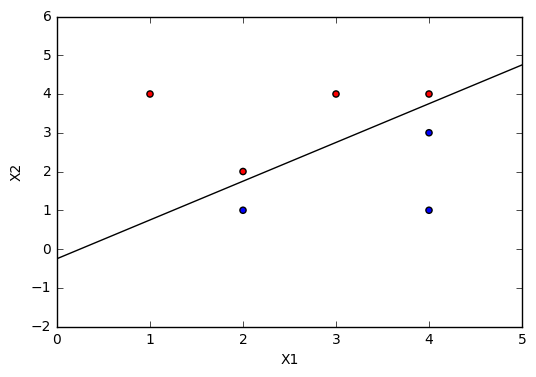

In [98]:
# Question f
# From the above result, only point 4,5,1,2 are the support vector.
# The seventh point is not in the support vector
# Thus any change in that point will not shift the hyperplane 

# Question g
# Another plane which is not the optima can be gained by moving the orginal plane
# Suppose we are using the plane x1-x2-0.25 = 0
# The hyperplane seperate the two classes. However, it does not maximize the margin
fig, ax = plt.subplots()
plt.scatter(df['x1'], df['x2'], c=df['c'], cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')
plt.plot([0,5],[-0.25,4.75],'-k')
ax.set_xlim([0,5]) 
ax.set_ylim([-2,6])

beta0=1
A = [[0,-0.25],[5,4.75]]
b = [-1, -1]
beta1, beta2 = np.linalg.solve(A,b).tolist()
print('Separating hyperplane coefficients:',beta0,beta1,beta2)



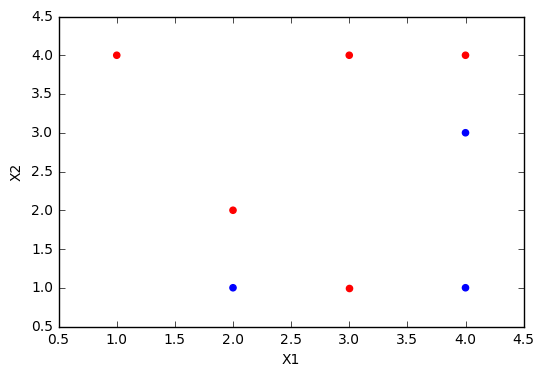

In [107]:
# Question h
# Now, we need to find a point that no plane can be able to perfectly seperate the two classes
plt.scatter(df['x1'],df['x2'],color = df['c'],cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')
# Adding point (3,1,red)
plt.scatter(3,1,color = "red",)

# Optional coding assignment
This is an __optional__ exercise, which will be graded and counted towards the class participation component of your grade (it could only improve your grade).

Read the first chapter in https://automatetheboringstuff.com/chapter1/ and solve the practice quetsions appearing at the end of the chapter.

In [ ]:
# Solution to Q1
#Q:1. Which of the following are operators, and which are values?

#*
#'hello'
#-88.8
#-
#/
#+
#5

#A: * , - , / , + are the operators
# 'hello', -88.8, 5 are the values

In [ ]:
# Solution to Q2
#Q: 2. Which of the following is a variable, and which is a string?

#spam
#'spam'


#A: spam is variable. 'spam' is string.

In [ ]:
# Solution to Q3
#Q:3. Name three data types.

#A: Integers, Floating-point numbers, Strings

In [ ]:
# Solution to Q4
#Q: 4. What is an expression made up of? What do all expressions do?

# A: Expressions consist of values (such as 2) and operators (such as +), 
# and they can always evaluate (that is, reduce) down to a single value. 
#

In [3]:
# Solution to Q5
# Q:
# 5. This chapter introduced assignment statements, like spam = 10. 
# What is the difference between an expression and a statement?

# A: The assignment statement store values in variables. An assignment statement consists of a variable name, 
# an equal sign (called the assignment operator), and the value to be stored.
# A statement is a complete line of code that performs some action, 
# while an expression is any section of the code that evaluates to a value. 

In [ ]:
# Solution to Q6
#Q: 6. What does the variable bacon contain after the following code runs?
# bacon = 20
# bacon + 1

# the variable bacon is still 20 after the following code.

In [ ]:
# Solution to Q7
#Q: 7. What should the following two expressions evaluate to?

#'spam' + 'spamspam'
#'spam' * 3

# The first expression evaluates down to a single, new string value that combines 
# the text of the two strings 'spam' and 'spamspam'.

#The expression evaluates down to a single string value 'spamspamspam' that repeats the original 
# 3 times.

In [ ]:
# Solution to Q8

# You can name a variable anything as long as it obeys the following three rules:
#It can be only one word.
#It can use only letters, numbers, and the underscore (_) character.
#It can’t begin with a number.
# eggs do not violate the three rules, while 100 violate the third rule.

In [ ]:
# Solution to Q9
# Q: 9. What three functions can be used to get the integer, floating-point number, or string version of a value?

# A: str() for string, int() for integer, float() for floating-point number


In [4]:
# Solution to Q10

#Q: 10. Why does this expression cause an error? How can you fix it?

# 'I have eaten ' + 99 + ' burritos.'

# Python gives an error because you can use the + operator only to add two integers together 
# or concatenate two strings. You can’t add an integer to a string because this is ungrammatical in Python.